In [1]:
from yahoo_fin import stock_info as si
from yahoo_fin import options as op
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [2]:
tickers = ['QQQ','AVGO','GOOG','META','AMD','MSFT','PLTR','GLD','INTC','AMZN','TSLA']
tickers = sorted(tickers)
# tickers = ['QQQ','GOOG','MSFT','INTC','TSLA','QCOM']
option_expiration_date = 'May 10, 2024'
# expiration_dates = op.get_expiration_dates(ticker)

In [3]:
class Stock:
    """Provide stock price data given ticker
    """
    
    def __init__(self, ticker):
        self.ticker = ticker
        
    def get_price(self):
        today = date.today()
        stock_end_date = today + timedelta(3)
        stock_start_date = today - timedelta(5)
        
        stock_data = si.get_data(self.ticker, start_date=stock_start_date, end_date=stock_end_date)
        stock_close_price = stock_data['close'][-1]
        stock_high_price = stock_data['high'][-1]
        stock_close_date = stock_data.index[-1].date()
        
        return {'close':stock_close_price, 'high':stock_high_price, 'stock_date':str(stock_close_date)}

In [4]:
class Option:
    """Provide option price data given ticker and expiration date
    """

    def __init__(self, ticker, expiration_date, stock_close_price):
        self.ticker = ticker
        self.expiration_date = expiration_date
        self.stock_close_price = stock_close_price
        
    def get_call_price(self):
        call_data = op.get_calls(self.ticker, self.expiration_date)[['Strike','Last Price','Bid','Ask','Open Interest']]
        call_data['Expiration Date'] = self.expiration_date
        call_data = call_data[(call_data['Strike'] > self.stock_close_price) & (call_data['Strike'] < self.stock_close_price*1.125)].reset_index(drop=True)

        return call_data

In [5]:
class Covered_call:
    """Get covered call purchase info from a csv file
    """
    
    def __init__(self, csv_file):
        self.csv_file = csv_file
        
    def get_covered_call_info(self):
        covered_call = pd.read_csv(self.csv_file,index_col='ticker')
        
        return covered_call

In [10]:
def plot_covered_call_price(ticker, stock_info, call_data, covered_price):
    """
    Plot call option price vs. strike price
    """
    
    close_price = stock_info['close']
    high_price = stock_info['high']
    stock_date = stock_info['stock_date']
    
    y_max = call_data['Ask'].max()
    plt.title(f'{ticker}\nStock Date: {stock_date}')
    plt.plot(call_data['Strike'],call_data['Bid'],marker='o',label='Bid')
    plt.plot(call_data['Strike'],call_data['Ask'],marker='o',label='Ask')
    
    plt.xlabel('Strike Price ($)')
    plt.ylabel('Bid and Ask Price ($)')
    
    plt.ylim(bottom=0)
    
    plt.axvline(close_price,color='blue',linewidth=1)
    plt.text(close_price,y_max*0.1,f'close\n{close_price:.2f}')
    
    plt.axvline(close_price * 1.10,color='green',linewidth=0.5,ls=':')
    plt.text(close_price*1.10,y_max*0.1,f'+10%\n{close_price*1.10:.2f}')
    
    plt.axvline(close_price * 1.05,color='green',linewidth=0.5,ls=':')
    plt.text(close_price*1.05,y_max*0.1,f'+5%\n{close_price*1.05:.2f}')
    
    plt.axvline(close_price * 1.025,color='green',linewidth=0.5,ls=':')
    plt.text(close_price*1.025,y_max*0.15,f'+2.5%\n{close_price*1.025:.2f}')
    
    plt.axvline(close_price * 1.075,color='green',linewidth=0.5,ls=':')
    plt.text(close_price*1.075,y_max*0.15,f'+7.5%\n{close_price*1.075:.2f}')
    
    plt.axvline(high_price,color='red',linewidth=1)
    plt.text(high_price,y_max*0.65,f'high\n{high_price:.2f}')
    
    if covered_price:
        plt.axvline(covered_strike,color='Orange',linewidth=1)
        plt.text(covered_strike,y_max*0.85,f'Strike\n{covered_strike:.2f}\nPrice\n{covered_price:.2f}')
        plt.xlim(left=close_price*0.99, right=max(close_price*1.125,covered_strike*1.02))
    else:
        plt.text(close_price*1.025,y_max*0.7,'No Covered Call Bought', color='red')
        plt.xlim(left=close_price*0.99)
    
    plt.grid(color='lightgrey',axis='y')
    plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
    plt.show()

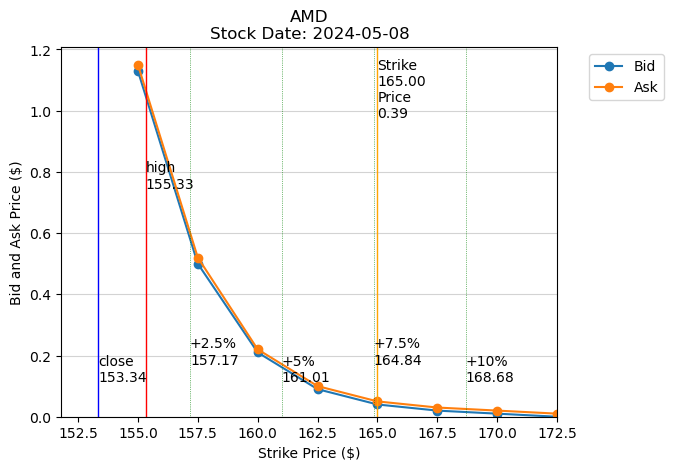

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,155.0,1.14,1.13,1.15,13245,"May 10, 2024"
1,157.5,0.52,0.50,0.52,7786,"May 10, 2024"
2,160.0,0.21,0.21,0.22,14113,"May 10, 2024"
3,162.5,0.10,0.09,0.10,5596,"May 10, 2024"
4,165.0,0.04,0.04,0.05,7260,"May 10, 2024"
5,167.5,0.02,0.02,0.03,4441,"May 10, 2024"
6,170.0,0.02,0.01,0.02,6919,"May 10, 2024"
7,172.5,0.01,0.00,0.01,2509,"May 10, 2024"


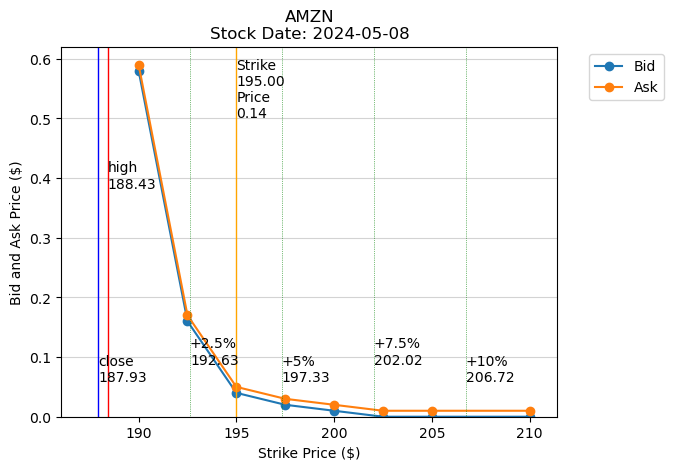

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,190.0,0.59,0.58,0.59,22781,"May 10, 2024"
1,192.5,0.16,0.16,0.17,10584,"May 10, 2024"
2,195.0,0.04,0.04,0.05,18931,"May 10, 2024"
3,197.5,0.03,0.02,0.03,6975,"May 10, 2024"
4,200.0,0.01,0.01,0.02,14978,"May 10, 2024"
5,202.5,0.01,0.00,0.01,479,"May 10, 2024"
6,205.0,0.01,0.00,0.01,3749,"May 10, 2024"
7,210.0,0.01,0.00,0.01,6960,"May 10, 2024"


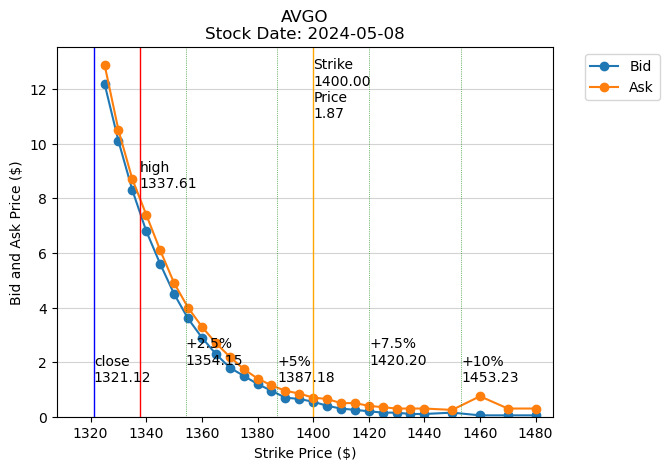

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,1325.0,12.40,12.20,12.90,301,"May 10, 2024"
1,1330.0,11.40,10.10,10.50,568,"May 10, 2024"
2,1335.0,8.70,8.30,8.70,125,"May 10, 2024"
3,1340.0,7.00,6.80,7.40,321,"May 10, 2024"
4,1345.0,5.95,5.60,6.10,150,"May 10, 2024"
5,1350.0,4.80,4.50,4.90,563,"May 10, 2024"
6,1355.0,3.95,3.60,4.00,128,"May 10, 2024"
7,1360.0,3.30,2.90,3.30,512,"May 10, 2024"
8,1365.0,2.55,2.30,2.70,95,"May 10, 2024"
9,1370.0,2.10,1.80,2.20,433,"May 10, 2024"


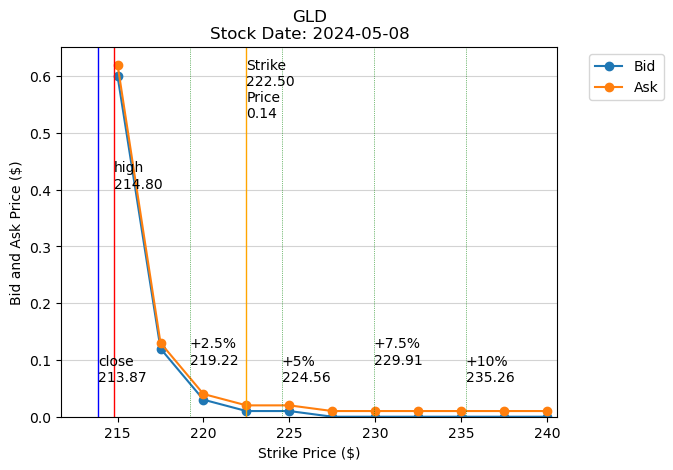

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,215.0,0.62,0.60,0.62,4132,"May 10, 2024"
1,217.5,0.12,0.12,0.13,4312,"May 10, 2024"
2,220.0,0.03,0.03,0.04,5374,"May 10, 2024"
3,222.5,0.01,0.01,0.02,2744,"May 10, 2024"
4,225.0,0.01,0.01,0.02,1967,"May 10, 2024"
5,227.5,0.01,0.00,0.01,1519,"May 10, 2024"
6,230.0,0.01,0.00,0.01,1756,"May 10, 2024"
7,232.5,0.01,0.00,0.01,1664,"May 10, 2024"
8,235.0,0.02,0.00,0.01,5803,"May 10, 2024"
9,237.5,0.01,0.00,0.01,1804,"May 10, 2024"


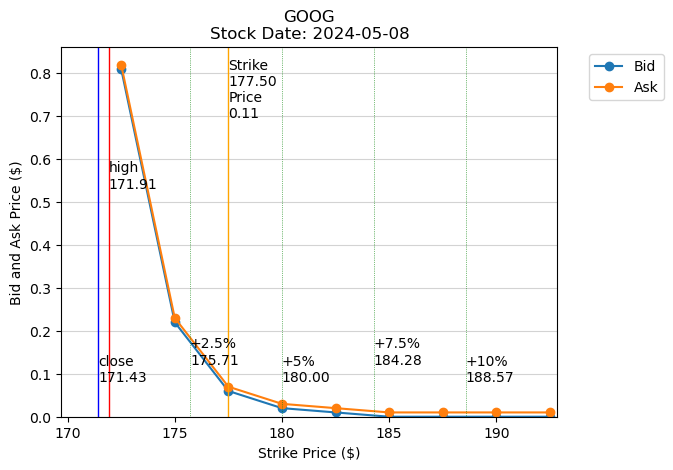

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,172.5,0.82,0.81,0.82,5681,"May 10, 2024"
1,175.0,0.22,0.22,0.23,5180,"May 10, 2024"
2,177.5,0.06,0.06,0.07,2675,"May 10, 2024"
3,180.0,0.03,0.02,0.03,5058,"May 10, 2024"
4,182.5,0.01,0.01,0.02,2447,"May 10, 2024"
5,185.0,0.01,0.00,0.01,2340,"May 10, 2024"
6,187.5,0.01,0.00,0.01,187,"May 10, 2024"
7,190.0,0.01,0.00,0.01,324,"May 10, 2024"
8,192.5,0.01,0.00,0.01,52,"May 10, 2024"


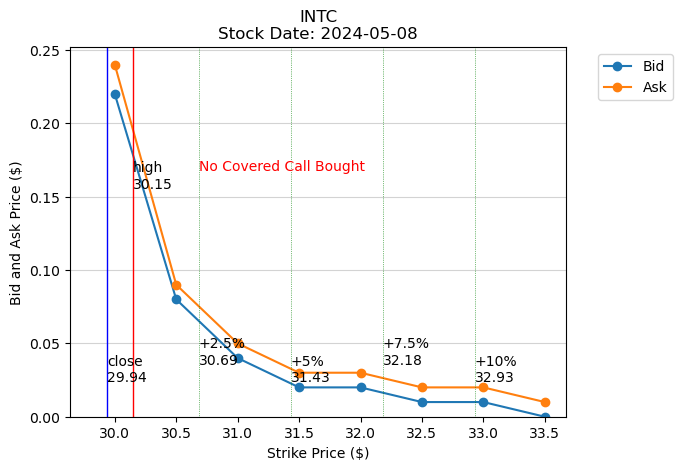

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,30.0,0.23,0.22,0.24,1559,"May 10, 2024"
1,30.5,0.09,0.08,0.09,2429,"May 10, 2024"
2,31.0,0.04,0.04,0.05,6562,"May 10, 2024"
3,31.5,0.03,0.02,0.03,10854,"May 10, 2024"
4,32.0,0.02,0.02,0.03,10105,"May 10, 2024"
5,32.5,0.01,0.01,0.02,12637,"May 10, 2024"
6,33.0,0.01,0.01,0.02,4027,"May 10, 2024"
7,33.5,0.01,0.00,0.01,2039,"May 10, 2024"


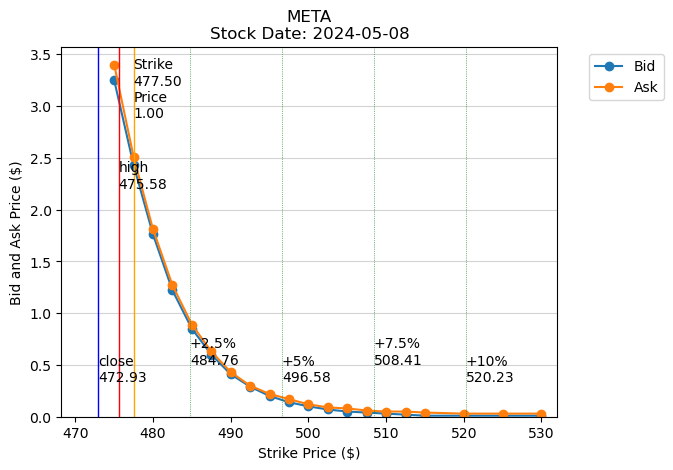

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,475.0,3.34,3.25,3.40,3431,"May 10, 2024"
1,477.5,2.46,2.43,2.51,1148,"May 10, 2024"
2,480.0,1.80,1.76,1.81,7430,"May 10, 2024"
3,482.5,1.23,1.22,1.27,3745,"May 10, 2024"
4,485.0,0.85,0.85,0.89,3859,"May 10, 2024"
5,487.5,0.59,0.60,0.63,1086,"May 10, 2024"
6,490.0,0.42,0.41,0.43,2447,"May 10, 2024"
7,492.5,0.29,0.29,0.30,691,"May 10, 2024"
8,495.0,0.19,0.20,0.22,2263,"May 10, 2024"
9,497.5,0.17,0.14,0.17,756,"May 10, 2024"


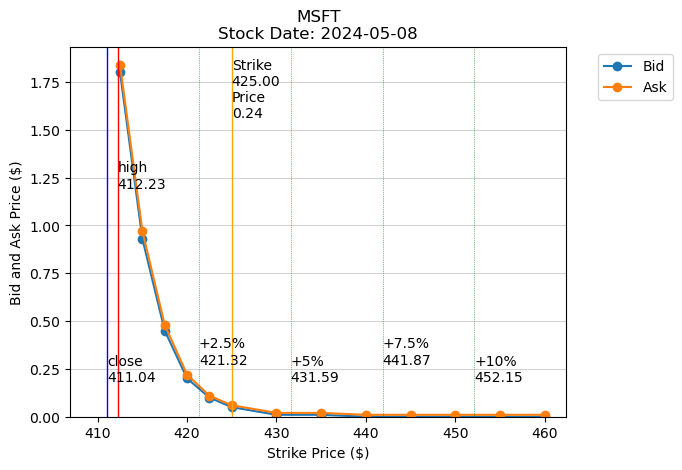

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,412.5,1.80,1.80,1.84,4416,"May 10, 2024"
1,415.0,0.95,0.93,0.97,7448,"May 10, 2024"
2,417.5,0.46,0.45,0.48,2942,"May 10, 2024"
3,420.0,0.20,0.20,0.22,8524,"May 10, 2024"
4,422.5,0.10,0.10,0.11,3345,"May 10, 2024"
5,425.0,0.06,0.05,0.06,5748,"May 10, 2024"
6,430.0,0.02,0.01,0.02,4839,"May 10, 2024"
7,435.0,0.02,0.01,0.02,1325,"May 10, 2024"
8,440.0,0.01,0.00,0.01,1156,"May 10, 2024"
9,445.0,0.01,0.00,0.01,872,"May 10, 2024"


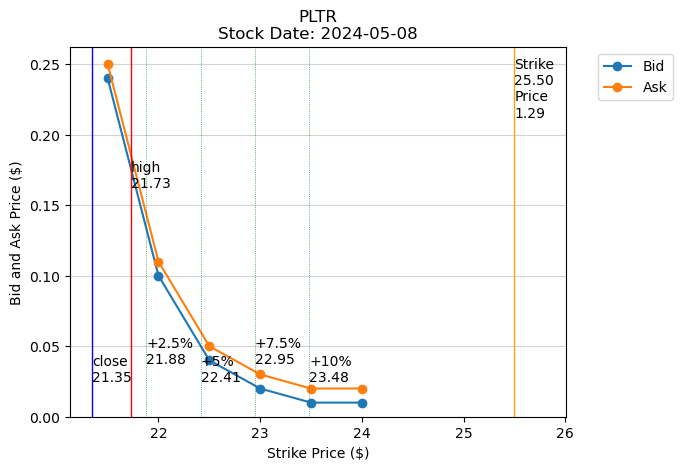

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,21.5,0.25,0.24,0.25,9255,"May 10, 2024"
1,22.0,0.10,0.10,0.11,25282,"May 10, 2024"
2,22.5,0.04,0.04,0.05,11717,"May 10, 2024"
3,23.0,0.03,0.02,0.03,22388,"May 10, 2024"
4,23.5,0.01,0.01,0.02,13671,"May 10, 2024"
5,24.0,0.02,0.01,0.02,12117,"May 10, 2024"


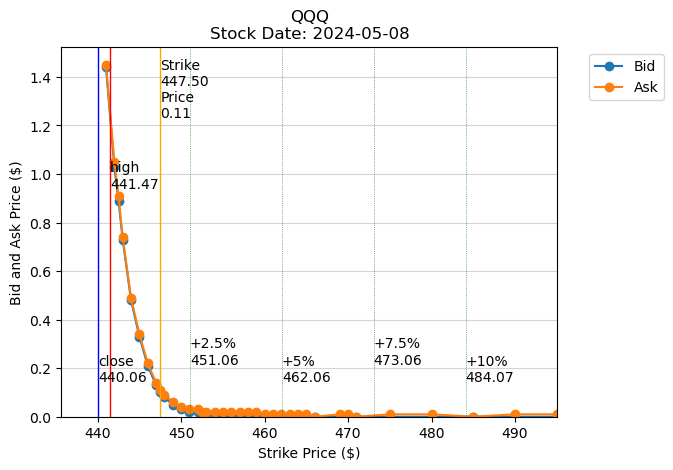

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,441.0,1.44,1.44,1.45,3145,"May 10, 2024"
1,442.0,1.08,1.03,1.05,7118,"May 10, 2024"
2,442.5,0.86,0.89,0.91,2943,"May 10, 2024"
3,443.0,0.67,0.73,0.74,5828,"May 10, 2024"
4,444.0,0.49,0.48,0.49,8589,"May 10, 2024"
5,445.0,0.33,0.33,0.34,13597,"May 10, 2024"
6,446.0,0.21,0.21,0.22,3903,"May 10, 2024"
7,447.0,0.13,0.13,0.14,5669,"May 10, 2024"
8,447.5,0.11,0.10,0.11,950,"May 10, 2024"
9,448.0,0.10,0.08,0.09,34933,"May 10, 2024"


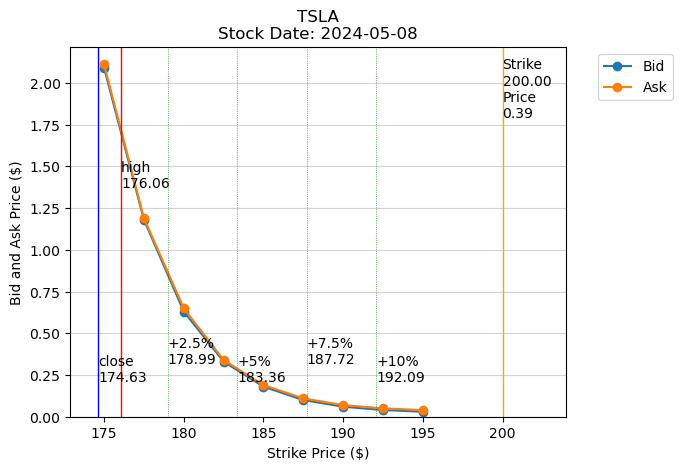

,Strike,Last Price,Bid,Ask,Open Interest,Expiration Date
0,175.0,2.10,2.09,2.11,6907,"May 10, 2024"
1,177.5,1.19,1.18,1.19,7869,"May 10, 2024"
2,180.0,0.63,0.63,0.65,25638,"May 10, 2024"
3,182.5,0.34,0.33,0.34,15661,"May 10, 2024"
4,185.0,0.18,0.18,0.19,49182,"May 10, 2024"
5,187.5,0.10,0.10,0.11,13667,"May 10, 2024"
6,190.0,0.06,0.06,0.07,34616,"May 10, 2024"
7,192.5,0.04,0.04,0.05,9413,"May 10, 2024"
8,195.0,0.04,0.03,0.04,22484,"May 10, 2024"


Covered call price data pull and plot completed successfully. Happy trading! :)


In [11]:
for ticker in tickers:
    stock = Stock(ticker)
    try:
        stock_info = stock.get_price()
    except:
        print('=' * 100)
        print(f'{ticker} may not be valid. Please verify and try again!')
        continue
        
    option = Option(ticker, option_expiration_date, stock_info['close'])
    try:
        call_data = option.get_call_price()
    except:
        print('=' * 100)
        print(f'{ticker} option data may not be available. Please verify and try again!')
        continue
    
    covered = Covered_call('../../data/covered_call.csv')
    covered_call = covered.get_covered_call_info()
    if ticker in covered_call.index:
        covered_strike = covered_call.loc[ticker][0]
        covered_price = covered_call.loc[ticker][1]
    else:
        covered_price = None

    print('=' * 100)
    plot_covered_call_price(ticker, stock_info, call_data, covered_price)
    display(call_data)
    
print('=' * 100)
print('Covered call price data pull and plot completed successfully. Happy trading! :)')